## 31 July 2018
-- Laurin Gray

Notebook to test Hess diagram function.

The data comes from the catalog of Spitzer sources of Khan et al. (2015), matched with sources from Whitelock et al. (2013) in CasJobs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
import csv
import pathlib
import os
import re

In [2]:
def plot_hess(xaxis, yaxis, y1=7.0, y2=21.5, x1=-3.0, x2=14.5, xlabel='', ylabel=''):
    """
    Plots a Hess diagram for the CMD.  Only has auto x-axis & y-axis info for the 8 CMDs, 
    user can specify their own axes limits in the code (defaults are biggest possible) & the axes labels in a string.
    
    Note that a pre-set axis may not automatically have the correct limits- the limits are set for a specific CMD,
    and can differ for different CMDs.
    
    Call example:
        plot_hess(threesixMINUSeightzero, eightzero)
        OR
        plot_hess(threesixMINUSfourfive, threesix, y1=7.5, y2=21.5, x1=-3.0, x2=2.5, 
                xlabel='[3.6] - [4.5]', ylabel='[3.6]')
    """
    
    if yaxis is eightzero and xaxis is threesixMINUSeightzero:
        y1 = 8.0
        y2 = 18.0
        ylabel = '[8.0]'
        x1 = -2.0
        x2 = 7.5
        xlabel = '[3.6] - [8.0]'
    elif yaxis is eightzero and xaxis is fourfiveMINUSeightzero:
        y1 = 8.0
        y2 = 18.0
        ylabel = '[8.0]'
        x1 = -1.5
        x2 = 6.5
        xlabel = '[4.5] - [8.0]'
    elif yaxis is Hmag and xaxis is jMINUSh:
        y1 = 11.5
        y2 = 19.0
        ylabel = 'H'
        x1 = -0.5
        x2 = 2.5
        xlabel = 'J - H'
    elif yaxis is Hmag and xaxis is hMINUSthreesix:
        y1 = 11.5
        y2 = 19.0
        ylabel = 'H'
        x1 = -1.5
        x2 = 4.0
        xlabel = 'H - [3.6]'
    elif yaxis is Hmag and xaxis is hMINUSfourfive:
        y1 = 11.5
        y2 = 19.0
        ylabel = 'H'
        x1 = -2.5
        x2 = 5.0
        xlabel = 'H - [4.5]'
    elif yaxis is Kmag and xaxis is hMINUSk:
        y1 = 11.5
        y2 = 19.0
        ylabel = 'K'
        x1 = -0.5
        x2 = 2.0
        xlabel = 'H - K'
    elif yaxis is Kmag and xaxis is jMINUSk:
        y1 = 11.5
        y2 = 19.0
        ylabel = 'K'
        x1 = -0.5
        x2 = 4.0
        xlabel = 'J - K'
    elif yaxis is threesix and xaxis is jMINUSthreesix:
        y1 = 11.5
        y2 = 19.0
        ylabel = '[3.6]'
        x1 = -0.5
        x2 = 6.0
        xlabel = 'J - [3.6]'
    else:
        print("That CMD is not automatically included, using defaults or manually entered values")
    
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 10))
    plt.xlim(x1, x2)
    plt.ylim(y2, y1)
    im1 = ax1.hexbin(xaxis, yaxis, bins='log', cmap=plt.cm.viridis,
                   mincnt=1, extent=(x1, x2, y2, y1))
    ax1.set_xlabel(xlabel, size=14)
    ax1.set_ylabel(ylabel, size=14)
    cb = plt.colorbar(im1, label='log(N)')

In [3]:
phot_data = pd.read_csv('~/Documents/Phot_data/CMDparameters26June2018_lauringray.csv')


In [4]:
phot_data['threesixMINUSfourfive'] = phot_data.k36mag.values - phot_data.k45mag.values
phot_data['threesixMINUSeightzero'] = phot_data.k36mag.values - phot_data.k80mag.values
#
phot_data['fourfiveMINUSeightzero'] = phot_data.k45mag.values - phot_data.k80mag.values
#
phot_data['jMINUSthreesix'] = phot_data.Jmag.values - phot_data.k36mag.values
#
phot_data['hMINUSthreesix'] = phot_data.Hmag.values - phot_data.k36mag.values
phot_data['hMINUSfourfive'] = phot_data.Hmag.values - phot_data.k45mag.values

In [5]:
# Some values in the tables are +/- 9999, due to null data from combining the tables, 
# which throws off the color scaling.  We wish to exclude these values, 
# which we do by cutting to only include values in the range -500:500

filter_phot_data = phot_data[(phot_data < 500.0) & (phot_data > -500.0)]

In [6]:
# Magnitudes
threesix = filter_phot_data.k36mag.values
eightzero = filter_phot_data.k80mag.values
Hmag = filter_phot_data.Hmag.values
Kmag = filter_phot_data.Kmag.values


# Colors
threesixMINUSfourfive = filter_phot_data.threesixMINUSfourfive.values
threesixMINUSeightzero = filter_phot_data.threesixMINUSeightzero.values

fourfiveMINUSeightzero = filter_phot_data.fourfiveMINUSeightzero.values

jMINUSthreesix = filter_phot_data.jMINUSthreesix.values
jMINUSh = filter_phot_data.jMINUSh.values
jMINUSk = filter_phot_data.jMINUSk.values

hMINUSthreesix = filter_phot_data.hMINUSthreesix.values
hMINUSfourfive = filter_phot_data.hMINUSfourfive.values
hMINUSk = filter_phot_data.hMINUSk.values

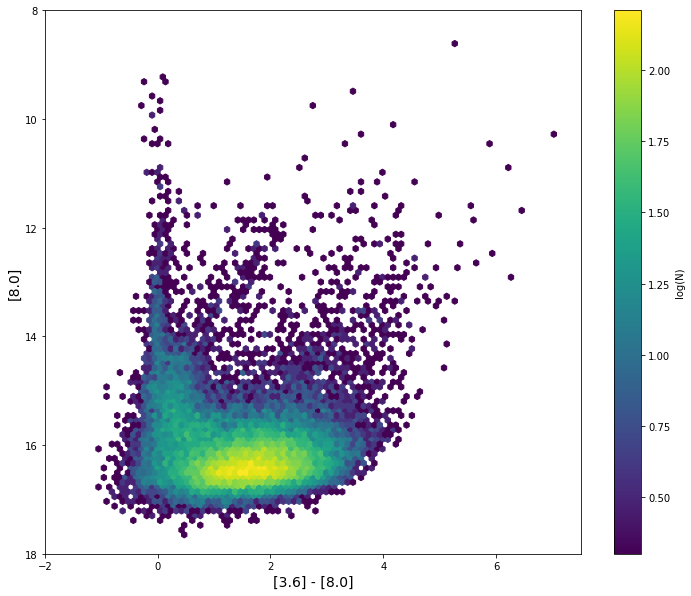

In [7]:
plot_hess(threesixMINUSeightzero, eightzero)

That CMD is not automatically included, using defaults or manually entered values


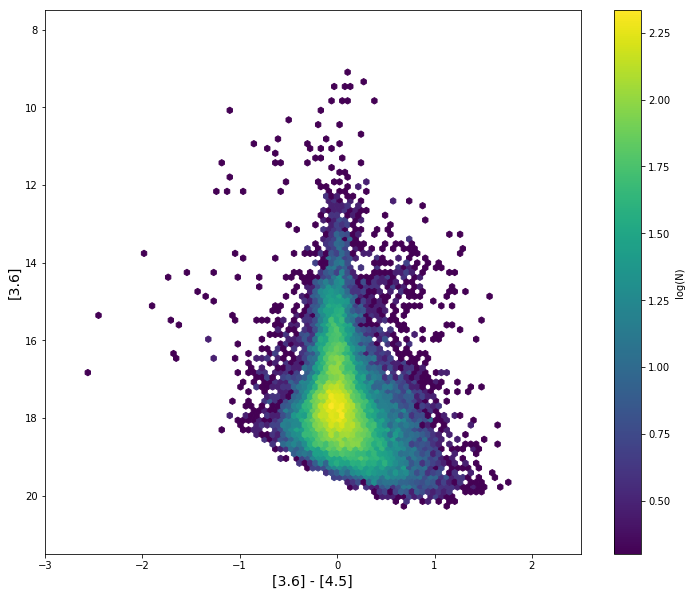

In [8]:
plot_hess(threesixMINUSfourfive, threesix, y1=7.5, y2=21.5, x1=-3.0, x2=2.5, xlabel='[3.6] - [4.5]', ylabel='[3.6]')